In [1]:
%matplotlib inline

# The Newton-Raphson Method

Nazeem showed me a pretty standard local max/min problem from the AP Calc AB practice book, and came up with an interesting question - without a graphing calculator, could you find the roots of the following function on the interval $0 \leq x \leq 3$?

$$ f(x) = \ln(x+1) - \sin^2x $$

Equations like these are _transcendental_, and rarely yield closed-form (i.e. expressible in a finite number of terms) solutions. By inspection we can see that 0 is a solution, but that's about it. 

So it's here we'll abandon any hope for an exact solution and resort to numerical methods. Since this function has a nice first derivative, we can use something called the Newton-Raphson method to search for roots. 

I like this method since it's pretty intuitive; we start with a guess near the root we'd like to find. I've marked that guess as point $P$ below:

<img src="img/nr_1.png"/>

We draw the tangent through $P$ and calculate its intersection with the x-axis. Because the tangent is a decent approximation for the function at that point, its x-intercept should also be a decent approximation for the root. 

<img src="img/nr_2.png"/>

We then start over, using our approximate root as our more accurate guess, and repeat to the desired precision. Algebraically, this is how things work out.

Let our first guess be called $x_0$, our function $f(x)$, and its first derivative, $f'(x)$.

The tangent line to $f(x)$ at $x_0$ is given by: 

$$ g(x) = f'(x_0)(x-x_0) + f(x_0) $$

The point of intersection with the x-axis is the value of $x$ such that $g(x) = 0$; we'll call this value $x_1$, our first approximation for the root. Informally, the tangent line "points" us toward the root. Thus: 

$$ 
\begin{align}
g(x_1)&=0 \\
f'(x_0)(x_1-x_0) + f(x_0) &= 0 \\
x_1 &= x_0 - \frac{f(x_0)}{f'(x_0)}
\end{align}
$$

Since we can repeat this same process over and over, we can write this more generally as:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

While we could do this by hand, it's more fun to code it, right?

This next block lets you dynamically adjust your guess and the depth of estimation in real time.

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# Define f(x) and its first derivative

def f(x):
    # You can change this to reflect the function you want
    return np.log(x+1) - (np.sin(x))**2
    
def df(x):
    # This needs to be the first derivative of the previous function
    return 1/abs(x+1) - np.sin(2*x)

def nr(guess, depth):
    # Have fun with this one. Recursion.
    if depth == 0:
        return guess
    
    elif depth == 1:
        return guess - f(guess)/df(guess)
    
    else:
        prev = nr(guess, depth - 1)
        return prev - f(prev)/df(prev)
    
interact(nr, guess=(0.0, 3.0), depth=(0, 10, 1));


0.96436320120960672

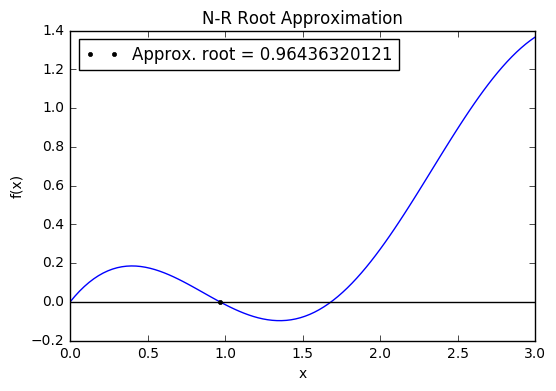

In [14]:
# Generate x values:
x = np.linspace(0, 3, 100)

# Enter your guess and depth here:
g = .75
d = 5

p = nr(g, d)

plt.plot(x, f(x))
plt.plot(p, f(p), 'k.', label='Approx. root = %s' % p)
plt.axhline(0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('N-R Root Approximation')
plt.legend(loc='upper left')
plt.show()